In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np 
import os 
import pandas as pd 
from typing import Tuple, List
from sklearn.cluster import KMeans
import pickle
import matplotlib.pyplot as plt

In [2]:
nRowsRead = None # specify 'None' if want to read whole file

df = pd.read_csv('../input/model_2015_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
directory = '../input/'

for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        file_path = os.path.join(directory, filename)
        df_ = pd.read_csv(file_path, delimiter=',', nrows = nRowsRead)
        df = pd.concat([df,df_[df_['failure'] == 1]],sort = False)

# df.dataframeName = 'model_2015_ST4000DM000.csv'
# df_ = pd.read_csv('../input/model_2016_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
# df_.dataframeName = 'model_2016_ST4000DM000.csv'
# df = pd.concat([df,df_],sort = False)
# df_ = pd.read_csv('../input/model_2017_ST4000DM000.csv', delimiter=',', nrows = nRowsRead)
# df_.dataframeName = 'model_2017_ST4000DM000.csv'
# df = pd.concat([df,df_],sort = False)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1372813 rows and 105 columns


In [3]:
df.head(5)

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_177_normalized,smart_177_raw,smart_179_normalized,smart_179_raw,smart_181_normalized,smart_181_raw,smart_182_normalized,smart_182_raw,smart_235_normalized,smart_235_raw
0,2015-01-01,Z300YN6R,ST4000DM000,4000787030016,0,117.0,134283496.0,NaN,NaN,97.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01,W300T09N,ST4000DM000,4000787030016,0,120.0,235812736.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01,Z3025923,ST4000DM000,4000787030016,1,117.0,159417104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-01,Z300GPJ7,ST4000DM000,4000787030016,0,110.0,25333728.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-01,Z300VALY,ST4000DM000,4000787030016,0,117.0,139107936.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,...,smart_177_normalized,smart_177_raw,smart_179_normalized,smart_179_raw,smart_181_normalized,smart_181_raw,smart_182_normalized,smart_182_raw,smart_235_normalized,smart_235_raw
count,1.372813e+06,1.372813e+06,1.372810e+06,1.372810e+06,0.0,0.0,1.372810e+06,1372810.0,1.372810e+06,1.372810e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,4.000781e+12,1.251882e-01,1.152630e+02,1.211711e+08,NaN,NaN,9.461283e+01,0.0,1.000000e+02,8.149295e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.828971e+09,3.309323e-01,3.861582e+00,7.038826e+07,NaN,NaN,2.961386e+00,0.0,1.706964e-03,1.093317e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-1.000000e+00,0.000000e+00,8.600000e+01,0.000000e+00,NaN,NaN,9.100000e+01,0.0,9.900000e+01,1.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000787e+12,0.000000e+00,1.140000e+02,5.952811e+07,NaN,NaN,9.200000e+01,0.0,1.000000e+02,3.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000787e+12,0.000000e+00,1.170000e+02,1.203359e+08,NaN,NaN,9.400000e+01,0.0,1.000000e+02,6.000000e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000787e+12,0.000000e+00,1.180000e+02,1.822052e+08,NaN,NaN,9.700000e+01,0.0,1.000000e+02,1.100000e+01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4.000787e+12,1.000000e+00,1.200000e+02,2.441401e+08,NaN,NaN,1.000000e+02,0.0,1.000000e+02,1.173000e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372813 entries, 0 to 178284
Columns: 105 entries, date to smart_235_raw
dtypes: float64(100), int64(2), object(3)
memory usage: 1.1+ GB


In [6]:
df_cleaned = df.dropna(axis=1, how='all')
df_cleaned = df_cleaned.dropna(axis = 0, how = 'all')
df_cleaned.drop(list(df_cleaned.filter(regex = 'normalized')), axis = 1, inplace = True)
df_cleaned = df_cleaned[[i for i in df_cleaned if df_cleaned[i].nunique()>1]]
df_cleaned.describe()

,capacity_bytes,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,smart_183_raw,smart_184_raw,...,smart_190_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
count,1.372813e+06,1.372813e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,...,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06,1.372810e+06
mean,4.000781e+12,1.251882e-01,1.211711e+08,8.149295e+00,1.625583e+01,3.892146e+10,9.034166e+03,9.170508e+00,2.335094e+00,1.172049e-02,...,2.512631e+01,2.739890e+00,2.100982e+04,2.512631e+01,9.973296e-01,9.973296e-01,4.291210e+00,5.261395e+13,1.764998e+10,9.354387e+10
std,4.828971e+09,3.309323e-01,7.038826e+07,1.093317e+01,4.515019e+02,2.606988e+12,6.452959e+03,1.535826e+02,9.179723e+01,3.151323e-01,...,4.713516e+00,9.444106e+00,3.331662e+04,4.713516e+00,4.054757e+01,4.054757e+01,1.220769e+02,8.417890e+13,6.870094e+09,8.101820e+10
min,-1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.400000e+01,0.000000e+00,2.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,1.641000e+03
25%,4.000787e+12,0.000000e+00,5.952811e+07,3.000000e+00,0.000000e+00,1.104041e+08,3.177000e+03,2.000000e+00,0.000000e+00,0.000000e+00,...,2.200000e+01,0.000000e+00,3.237000e+03,2.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.077000e+03,1.346768e+10,8.998960e+09
50%,4.000787e+12,0.000000e+00,1.203359e+08,6.000000e+00,0.000000e+00,2.310054e+08,8.002000e+03,6.000000e+00,0.000000e+00,0.000000e+00,...,2.500000e+01,1.000000e+00,1.266500e+04,2.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,8.510000e+03,1.787112e+10,9.288863e+10
75%,4.000787e+12,0.000000e+00,1.822052e+08,1.100000e+01,0.000000e+00,4.696381e+08,1.406800e+04,1.000000e+01,0.000000e+00,0.000000e+00,...,2.800000e+01,3.000000e+00,2.634700e+04,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,9.345849e+13,2.227402e+10,1.427875e+11
max,4.000787e+12,1.000000e+00,2.441401e+08,1.173000e+03,6.472000e+04,2.814717e+14,4.128400e+04,1.641500e+04,6.032000e+03,4.000000e+01,...,1.410000e+02,1.167000e+03,6.474770e+05,1.410000e+02,1.566400e+04,1.566400e+04,5.415000e+03,2.814707e+14,5.855064e+10,6.463693e+11


In [7]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372813 entries, 0 to 178284
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   date            1372813 non-null  object 
 1   serial_number   1372813 non-null  object 
 2   capacity_bytes  1372813 non-null  int64  
 3   failure         1372813 non-null  int64  
 4   smart_1_raw     1372810 non-null  float64
 5   smart_4_raw     1372810 non-null  float64
 6   smart_5_raw     1372810 non-null  float64
 7   smart_7_raw     1372810 non-null  float64
 8   smart_9_raw     1372810 non-null  float64
 9   smart_12_raw    1372810 non-null  float64
 10  smart_183_raw   1372810 non-null  float64
 11  smart_184_raw   1372810 non-null  float64
 12  smart_187_raw   1372810 non-null  float64
 13  smart_188_raw   1372810 non-null  float64
 14  smart_189_raw   1372810 non-null  float64
 15  smart_190_raw   1372810 non-null  float64
 16  smart_192_raw   1372810 non-null  float64


In [8]:
df_cleaned.head()

,date,serial_number,capacity_bytes,failure,smart_1_raw,smart_4_raw,smart_5_raw,smart_7_raw,smart_9_raw,smart_12_raw,...,smart_190_raw,smart_192_raw,smart_193_raw,smart_194_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw
0,2015-01-01,Z300YN6R,4000787030016,0,134283496.0,3.0,0.0,74635687.0,1641.0,3.0,...,22.0,2.0,2443.0,22.0,0.0,0.0,0.0,1.624000e+03,8.441971e+09,2.469779e+10
1,2015-01-01,W300T09N,4000787030016,0,235812736.0,14.0,0.0,138184468.0,3534.0,14.0,...,27.0,2.0,115041.0,27.0,0.0,0.0,0.0,2.311122e+13,1.025090e+10,2.269857e+10
2,2015-01-01,Z3025923,4000787030016,1,159417104.0,1.0,0.0,86152902.0,1350.0,1.0,...,21.0,0.0,17.0,21.0,0.0,0.0,0.0,1.350000e+03,8.734935e+09,2.309538e+10
3,2015-01-01,Z300GPJ7,4000787030016,0,25333728.0,10.0,0.0,131298458.0,12845.0,10.0,...,29.0,5.0,13967.0,29.0,0.0,0.0,0.0,1.436581e+14,2.187359e+10,1.156925e+11
4,2015-01-01,Z300VALY,4000787030016,0,139107936.0,4.0,0.0,691675817.0,9366.0,3.0,...,27.0,1.0,6163.0,27.0,0.0,0.0,0.0,1.703169e+14,1.840603e+10,4.845404e+10


In [9]:
df_cleaned = df_cleaned.drop(columns=['capacity_bytes'])
df_cleaned = df_cleaned[[i for i in df_cleaned if df_cleaned[i].nunique()>1]]
df_cleaned = df_cleaned.dropna(axis = 0, how = 'any')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1372810 entries, 0 to 178284
Data columns (total 24 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   date           1372810 non-null  object 
 1   serial_number  1372810 non-null  object 
 2   failure        1372810 non-null  int64  
 3   smart_1_raw    1372810 non-null  float64
 4   smart_4_raw    1372810 non-null  float64
 5   smart_5_raw    1372810 non-null  float64
 6   smart_7_raw    1372810 non-null  float64
 7   smart_9_raw    1372810 non-null  float64
 8   smart_12_raw   1372810 non-null  float64
 9   smart_183_raw  1372810 non-null  float64
 10  smart_184_raw  1372810 non-null  float64
 11  smart_187_raw  1372810 non-null  float64
 12  smart_188_raw  1372810 non-null  float64
 13  smart_189_raw  1372810 non-null  float64
 14  smart_190_raw  1372810 non-null  float64
 15  smart_192_raw  1372810 non-null  float64
 16  smart_193_raw  1372810 non-null  float64
 17  smart_194_raw 

In [10]:
# columns_to_cluster = df_cleaned.loc[:, 'smart_1_raw':]
for key in df_cleaned.loc[:,'smart_1_raw':].columns:
    num_clusters = 10
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
    cluster_labels = kmeans.fit_predict(df_cleaned[key].to_numpy().reshape(-1,1))
    df_cleaned[key] = cluster_labels

    #  df_cleaned[key] = pd.cut(x = list(df_cleaned[key]), bins = 10, labels = [0,1,2,3,4,5,6,7,8,9])

In [11]:
group = df_cleaned.groupby('serial_number')
group.size()

serial_number
S3000FZ5    121
S3000QAP    121
S3002DLG    120
S3002HH0    121
S30034E6    121
           ... 
Z305Q0J8    120
Z3066LL9     32
Z306B7ZJ     47
Z306MW5B     25
Z307G464     21
Length: 11143, dtype: int64

In [12]:
failure_df = group.filter(lambda x : x['failure'].sum() > 0)
success_df = group.filter(lambda x : x['failure'].sum() <= 0)

In [13]:
def split_dataset(df: pd.DataFrame, key: str = 'serial_number') -> Tuple[pd.DataFrame, pd.DataFrame]:
    keys_set = df[key].unique()
    keys_train, keys_test = train_test_split(keys_set)
    df_train, df_test = df[df[key].isin(keys_train)], df[df[key].isin(keys_test)]
    df_train = df_train.sort_values(by='date')
    df_test = df_test.sort_values(by='date')
    return df_train, df_test

In [14]:
def group_to_hmminput(df : pd.DataFrame) -> Tuple[dict[str,np.ndarray],List[int]]:
    df = df.sort_values(by = ['serial_number','date'])
    grouped = df.groupby('serial_number')
    sequence = dict(zip(df.loc[:,'smart_1_raw':].columns,[df[col].to_numpy(dtype = 'uint32').reshape(-1,1) for col in df.loc[:,'smart_1_raw':].columns]))
    lengths = list(grouped.size().values)
            
    return sequence, lengths

In [15]:
failure_train, failure_test = split_dataset(failure_df)
failure_train, failure_train_len = group_to_hmminput(failure_train)
failure_test, failure_test_len = group_to_hmminput(failure_test)

In [16]:
success_train, success_test = split_dataset(success_df)
success_train, success_train_len = group_to_hmminput(success_train)
success_test, success_test_len = group_to_hmminput(success_test)

In [17]:
from hmmlearn import hmm

In [18]:
model1 = {}
for attr in failure_train.keys():
    model1[attr] = hmm.CategoricalHMM(n_components = 5, n_features = 10, n_iter = 3)
    model1[attr].fit(failure_train[attr],failure_train_len)

In [19]:
model2 = {}
for attr in success_train.keys():
    model2[attr] = hmm.CategoricalHMM(n_components = 5, n_features = 10, n_iter = 3)
    model2[attr].fit(success_train[attr][:sum(success_train_len[:len(failure_train_len)])], success_train_len[:len(failure_train_len)]) #Equal Dataset
    # model2[attr].fit(success_train[attr],success_train_len) : Full Dataset

In [20]:
def model_save(model_dict : dict, model_type : str) -> None:
    save_path = f"../models/{model_type[0].upper() + model_type[1:]}"
    for attr_name, model in model_dict.items():
        filename = f"{save_path}/{attr_name}.pkl"
        with open(filename, "wb") as file:
            pickle.dump(model, file)

In [21]:
def split_concatenated_arrays(concatenated_dict : dict, lengths : List[int]):
    original_dict = {}
    for key,concatenated_list in concatenated_dict.items():
        original_arrays = []
        start = 0
        for length in lengths:
            end = start + length
            new_list = concatenated_list[start:end]
            original_arrays.append(new_list)
            start = end
        original_dict[key] = original_arrays
    return original_dict

In [22]:
failure_testset = split_concatenated_arrays(failure_test,failure_test_len)

In [23]:
success_testset = split_concatenated_arrays(success_test,success_test_len[:len(failure_test_len)])

In [24]:
# true_label = [1]*len(failure_test_len)+[0]*len(success_test_len) : Full Dataset
true_label = [1]*len(failure_test_len)+[0]*len(failure_test_len) #Equal Dataset

In [25]:
def test_model(testset, lengths) -> List[int]:
    pred_label = []
    for i in range(len(lengths)):
        scores = {}
        for key in testset:
            scores[key] = model1[key].score(testset[key][i]) - model2[key].score(testset[key][i])
        if np.average(np.array(list(scores.values()))) > 0 :
            pred_label.append(1)
        else : 
            pred_label.append(0)
    return pred_label
        # if(abs(min(scores.values())) > max(scores.values())):
        #     pred_label.append(0)
        # else :
        #     pred_label.append(1)

In [26]:
fail_test = test_model(failure_testset, failure_test_len)
success_test = test_model(success_testset, success_test_len[:len(failure_test_len)])
pred_label = fail_test + success_test

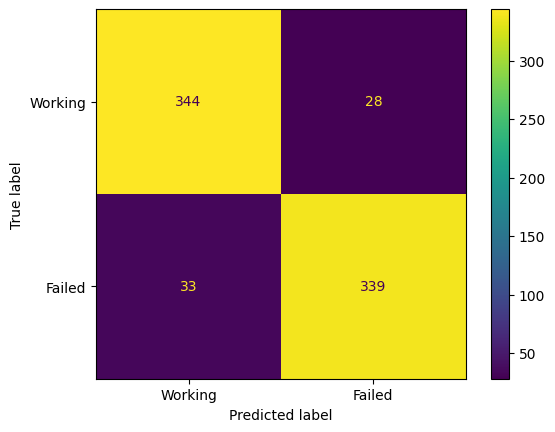

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
conf = confusion_matrix(true_label , pred_label)
ConfusionMatrixDisplay(
conf,display_labels = ['Working','Failed']
).plot()

In [28]:
print(classification_report(true_label , pred_label))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       372
           1       0.92      0.91      0.92       372

    accuracy                           0.92       744
   macro avg       0.92      0.92      0.92       744
weighted avg       0.92      0.92      0.92       744

